In [1]:
import glob
import matplotlib.pyplot as plt
from PIL import Image
import face_recognition
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
image_paths = glob.glob("Train/*")

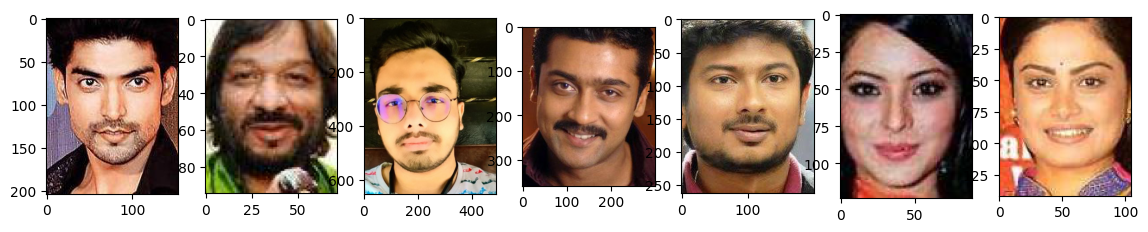

In [3]:
fig, axs = plt.subplots(1, 7, figsize=(14, 5))
axs = axs.flatten()
for path, ax in zip(image_paths[:7], axs):
    file = Image.open(path)
    ax.imshow(file)

In [4]:
image_paths

['Train\\train_0.jpg',
 'Train\\train_1.jpg',
 'Train\\train_10.jpg',
 'Train\\train_100.jpg',
 'Train\\train_101.jpg',
 'Train\\train_102.jpg',
 'Train\\train_103.jpg',
 'Train\\train_104.jpg',
 'Train\\train_105.jpg',
 'Train\\train_106.jpg',
 'Train\\train_107.jpg',
 'Train\\train_108.jpg',
 'Train\\train_109.jpg',
 'Train\\train_11.jpg',
 'Train\\train_110.jpg',
 'Train\\train_111.jpg',
 'Train\\train_112.jpg',
 'Train\\train_113.jpg',
 'Train\\train_114.jpg',
 'Train\\train_12.jpg',
 'Train\\train_13.jpg',
 'Train\\train_14.jpg',
 'Train\\train_15.jpg',
 'Train\\train_16.jpg',
 'Train\\train_17.jpg',
 'Train\\train_18.jpg',
 'Train\\train_19.jpg',
 'Train\\train_2.jpg',
 'Train\\train_20.jpg',
 'Train\\train_21.jpg',
 'Train\\train_22.jpg',
 'Train\\train_23.jpg',
 'Train\\train_24.jpg',
 'Train\\train_25.jpg',
 'Train\\train_26.jpg',
 'Train\\train_27.jpg',
 'Train\\train_28.jpg',
 'Train\\train_29.jpg',
 'Train\\train_3.jpg',
 'Train\\train_30.jpg',
 'Train\\train_31.jpg',
 'Tra

In [5]:
len(image_paths)

115

# CREATING EMBEDDINGS AND SAVING THEM IN A LIST

In [6]:
image_encodings = []
errors = []

for path in tqdm(image_paths):
    try:
        #read the image
        image = face_recognition.load_image_file(path)
        #generate face embedding
        encoding = face_recognition.face_encodings(image)[0]

        image_encodings.append((path.split("\\")[-1].split(".")[0], encoding))
    except:
        errors.append((path.split("\\")[-1].split(".")[0], image.shape))

100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [00:42<00:00,  2.71it/s]


In [7]:
len(image_encodings), errors

(115, [])

# Save Embeddings as an excel file

In [8]:
embeds_df = pd.concat([pd.DataFrame([ele[0] for ele in image_encodings], columns=['img_name']), pd.DataFrame([list(ele[1]) for ele in image_encodings])], axis=1)

In [9]:
embeds_df

,img_name,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,train_0,-0.173669,0.162933,0.048287,-0.021197,-0.089721,-0.026569,-0.086477,-0.019975,0.112909,...,0.091483,0.064084,-0.011877,-0.015731,-0.081161,-0.101445,0.039996,-0.070071,0.129338,0.073684
1,train_1,-0.077975,0.088061,0.114039,0.037360,-0.004132,-0.073270,0.061974,-0.054814,0.111567,...,0.029751,0.108471,0.036789,-0.028416,-0.031922,-0.101368,-0.005911,-0.038410,0.079923,0.037936
2,train_10,-0.066061,0.021619,0.015455,-0.021213,-0.015227,0.057458,-0.060747,-0.034993,0.169359,...,0.108528,0.049943,-0.014047,-0.030299,-0.193119,-0.079650,-0.021669,0.048047,-0.021222,-0.052022
3,train_100,-0.138627,0.070814,0.111484,-0.078329,-0.065062,0.037757,-0.075070,-0.047876,0.206295,...,0.087939,0.103938,0.037023,0.055703,-0.095851,-0.109556,0.020291,-0.021463,0.179697,0.103931
4,train_101,-0.127212,0.042056,0.018153,-0.081881,-0.088533,-0.044829,-0.030520,-0.067705,0.133196,...,0.135250,0.086616,-0.035996,-0.090845,-0.174453,-0.075608,-0.024457,-0.071485,0.120225,0.010764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,train_95,-0.100959,0.079461,0.046631,-0.053935,-0.080329,-0.029181,0.058080,-0.145022,0.191805,...,0.065943,0.028955,0.075249,0.039912,-0.089889,-0.110378,-0.016671,-0.077678,0.087655,0.122744
111,train_96,-0.143532,0.059905,0.072962,-0.096404,-0.082821,-0.075387,-0.113579,-0.150610,0.251689,...,0.020066,0.106543,0.056168,-0.040368,-0.130792,-0.022752,0.097818,-0.108527,0.110920,0.018154
112,train_97,-0.142534,0.061267,0.124499,-0.156318,-0.136793,-0.061213,-0.120705,-0.071096,0.158958,...,0.130956,0.081396,0.070385,0.021889,-0.176864,-0.049148,0.075487,-0.138648,0.114939,0.044030
113,train_98,-0.170027,0.069673,0.092409,-0.121228,-0.159307,-0.067599,-0.073645,-0.122514,0.112896,...,0.120104,0.059360,0.029333,-0.027385,-0.110443,-0.090595,0.066901,-0.184411,0.146669,0.075188


In [10]:
#new column names for the columns corresponding to the embedding vector elements
new_col_names = dict(zip(embeds_df.columns[1:], [f"e{i}" for i in range(1, 129)]))

In [11]:
#Renaming columns
embeds_df.rename(columns=new_col_names, inplace=True)
embeds_df

,img_name,e1,e2,e3,e4,e5,e6,e7,e8,e9,...,e119,e120,e121,e122,e123,e124,e125,e126,e127,e128
0,train_0,-0.173669,0.162933,0.048287,-0.021197,-0.089721,-0.026569,-0.086477,-0.019975,0.112909,...,0.091483,0.064084,-0.011877,-0.015731,-0.081161,-0.101445,0.039996,-0.070071,0.129338,0.073684
1,train_1,-0.077975,0.088061,0.114039,0.037360,-0.004132,-0.073270,0.061974,-0.054814,0.111567,...,0.029751,0.108471,0.036789,-0.028416,-0.031922,-0.101368,-0.005911,-0.038410,0.079923,0.037936
2,train_10,-0.066061,0.021619,0.015455,-0.021213,-0.015227,0.057458,-0.060747,-0.034993,0.169359,...,0.108528,0.049943,-0.014047,-0.030299,-0.193119,-0.079650,-0.021669,0.048047,-0.021222,-0.052022
3,train_100,-0.138627,0.070814,0.111484,-0.078329,-0.065062,0.037757,-0.075070,-0.047876,0.206295,...,0.087939,0.103938,0.037023,0.055703,-0.095851,-0.109556,0.020291,-0.021463,0.179697,0.103931
4,train_101,-0.127212,0.042056,0.018153,-0.081881,-0.088533,-0.044829,-0.030520,-0.067705,0.133196,...,0.135250,0.086616,-0.035996,-0.090845,-0.174453,-0.075608,-0.024457,-0.071485,0.120225,0.010764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,train_95,-0.100959,0.079461,0.046631,-0.053935,-0.080329,-0.029181,0.058080,-0.145022,0.191805,...,0.065943,0.028955,0.075249,0.039912,-0.089889,-0.110378,-0.016671,-0.077678,0.087655,0.122744
111,train_96,-0.143532,0.059905,0.072962,-0.096404,-0.082821,-0.075387,-0.113579,-0.150610,0.251689,...,0.020066,0.106543,0.056168,-0.040368,-0.130792,-0.022752,0.097818,-0.108527,0.110920,0.018154
112,train_97,-0.142534,0.061267,0.124499,-0.156318,-0.136793,-0.061213,-0.120705,-0.071096,0.158958,...,0.130956,0.081396,0.070385,0.021889,-0.176864,-0.049148,0.075487,-0.138648,0.114939,0.044030
113,train_98,-0.170027,0.069673,0.092409,-0.121228,-0.159307,-0.067599,-0.073645,-0.122514,0.112896,...,0.120104,0.059360,0.029333,-0.027385,-0.110443,-0.090595,0.066901,-0.184411,0.146669,0.075188


In [12]:
#saving the emebeddings in excel for easy viewing
embeds_df.to_excel("embeddings.xlsx", index=False)

# Converting Pandas Dataframe to SQLite and saving it

In [13]:
# sqlite
import sqlite3

In [14]:
conn = sqlite3.connect("facial_recognition.db")

In [15]:
embeds_df.to_sql(name="embeds", con=conn, index=False)

115

# Fetching all rows from the SQLite DB

In [16]:
cur = conn.cursor()

In [17]:
cur.execute("SELECT * FROM embeds")

In [18]:
rows = cur.fetchall()

In [19]:
rows

[('train_0',
  -0.17366907000541687,
  0.16293330490589142,
  0.04828685522079468,
  -0.0211965199559927,
  -0.08972124755382538,
  -0.026569394394755363,
  -0.08647747337818146,
  -0.019974613562226295,
  0.112909235060215,
  0.022142726927995682,
  0.10722784698009491,
  -0.05367740988731384,
  -0.2111644446849823,
  -0.05182759836316109,
  -0.06927301734685898,
  0.10154709219932556,
  -0.15441486239433289,
  -0.17315495014190674,
  -0.03610243648290634,
  -0.06259862333536148,
  0.13270360231399536,
  0.0284747201949358,
  -0.011140486225485802,
  0.06827051192522049,
  -0.18876604735851288,
  -0.23732872307300568,
  -0.06745840609073639,
  -0.09751037508249283,
  0.08269413560628891,
  -0.05829639360308647,
  -0.059929899871349335,
  -0.059284813702106476,
  -0.23609104752540588,
  -0.080330029129982,
  0.004012326709926128,
  0.11559032648801804,
  0.04511929303407669,
  -0.026248479261994362,
  0.16794133186340332,
  -0.019940949976444244,
  -0.131116583943367,
  -0.047113262116